***

# Ej. 5. TNG300 - FVR

***

The IllustrisTNG simulations represent the most ambitious attempt to run with the same model of magnetohydrodynamic galaxy formation across the largest number of cosmological boxes of different sizes and particle/cell resolutions. There are currently a total of 20 simulations, across three sizes of cosmological boxes (50, 100, and 300 Mpc on a side). For each size, there are three different resolutions (e.g., TNG100-1, TNG100-2, TNG100-3), although TNG50 has an additional resolution, and all are available in Dark Matter Only and hydrodynamic versions. All of their data are in the public domain.
The physical model used is called AREPO (Springel et al. 2010), which since 2019 has also been publicly available (https://arepo-code.org/). It is an Eulerian model. Unlike Smooth Particle Hydrodynamics (SPH) models, which calculate the dynamic evolution of particles, AREPO considers space subdivided into cells, which change shape depending on resolution needs. This type of model offers several advantages when modeling gas hydrodynamics, such as better behavior in shock zones. Additionally, it is one of the first to involve magnetism in hydrodynamic equations (see, if curiosity drives you, the work of Pakmor, 2016). The best way to learn about the project in detail is to explore its website https://www.tng-project.org/, and read some of the associated papers https://www.tng-project.org/results/.

In this practice, we will work with data already extracted from the simulation, and the variable names correspond to those described in https://www.tng-project.org/data/docs/specifications/#sec2b, which must be consulted to understand what the names represent and what units they have.

The data come from the IllustrisTNG300 simulation, which has 14,485,709 galaxies distributed in a box that is 205,000 $h^{-1}$ kpc on a side

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import seaborn as sns
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [10]:
h = 0.6774
mass_conv = 1e10

f = h5py.File('Data-TNG300.hdf5', 'r')

print(f.keys()) 
SubhaloHalfmassRadType = f['SubhaloHalfmassRadType'][:]
SubhaloMassInHalfRadType = f['SubhaloMassInHalfRadType'][:]
SubhaloMass_0 = f['SubhaloMass'][:]
SubhaloMassType = f['SubhaloMassType'][:]
# It has 6 types of particles: Gas, DM, (), Tracers, Stars & Wind, BHs
# In units of M_Sun/h
SubhaloPos = f['SubhaloPos'][:]
SubhaloSFR = f['SubhaloSFR'][:]
SubhaloSFRinHalfRad = f['SubhaloSFRinHalfRad'][:]

SubhaloStellarPhotometrics = f['SubhaloStellarPhotometrics'][:]

f.close()

r_mag_0 = SubhaloStellarPhotometrics[:, 5]
StellarMass = SubhaloMassType[:,4] * mass_conv / h
DMMass = SubhaloMassType[:,1] * mass_conv / h
SubhaloMass = SubhaloMass_0  * mass_conv / h

<KeysViewHDF5 ['SubhaloHalfmassRadType', 'SubhaloMass', 'SubhaloMassInHalfRadType', 'SubhaloMassType', 'SubhaloPos', 'SubhaloSFR', 'SubhaloSFRinHalfRad', 'SubhaloStellarPhotometrics']>


***

# Ej. 5: Color-color and color-magnitude diagrams

Do the color-color (u-b) vs (b-v) diagram, and color-magnitude (g-r) vs Mr diagram. Explore, using histograms, the value and ranges of the variables involved. Consider galaxies with stellar masses of $M_\star > 10^8 \, M_\odot$ (you can justify this in terms of the resolution of the simulation!). 
Later, separate galaxies in different ranges of star-formation rate and specific SFR ($SFR/M_\star$).

In [11]:
g_r = SubhaloStellarPhotometrics[:,4]-SubhaloStellarPhotometrics[:,5]
u_b = SubhaloStellarPhotometrics[:,0]-SubhaloStellarPhotometrics[:,2]
b_v = SubhaloStellarPhotometrics[:,2]-SubhaloStellarPhotometrics[:,1]

r_mag = SubhaloStellarPhotometrics[:, 5]

In [12]:
Ngal = len(r_mag)
print('Number of galaxies: {}'.format(Ngal))

mask = (r_mag>-27)&(r_mag<-15)
maskc = np.log10(StellarMass)>9.

Number of galaxies: 14485709


/tmp/ipykernel_3233759/1982970019.py:5: RuntimeWarning: divide by zero encountered in log10
  maskc = np.log10(StellarMass)>9.


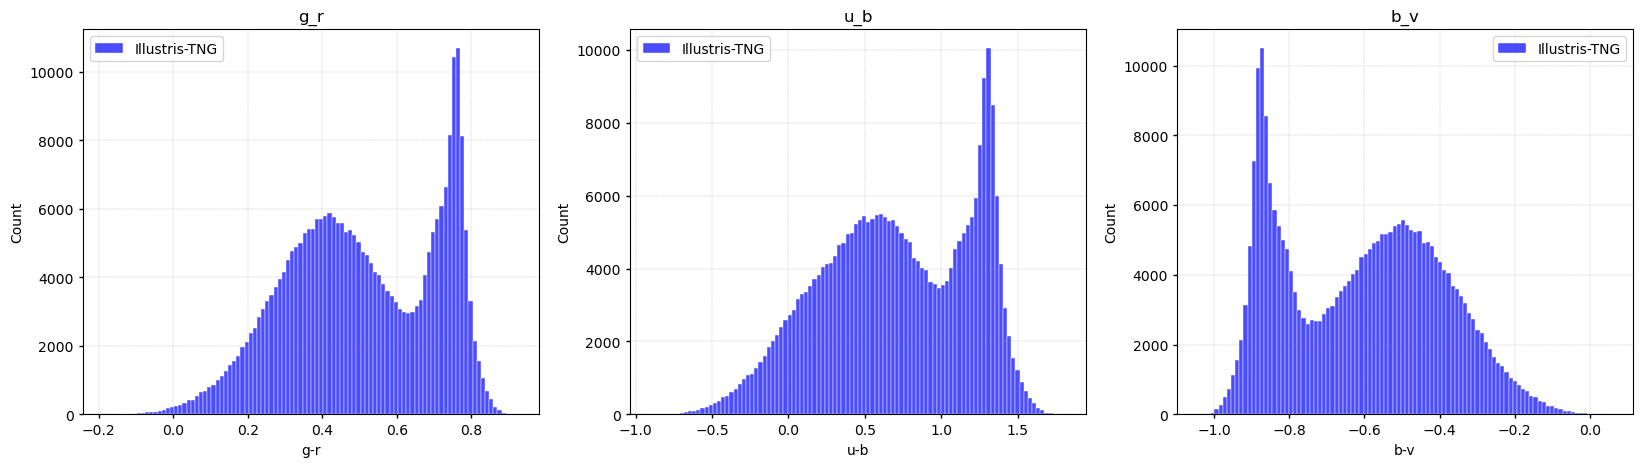

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(20, 5))

ax = sns.histplot(g_r[maskc], bins = 100, ax = axes[0], color='blue', alpha = 0.7, kde = False, edgecolor='white', label='Illustris-TNG')
ax.set_title('g_r', fontsize=12)
ax.tick_params(axis='both', which='both', direction='out', length=3, width=1)
ax.grid(color='gray', linestyle=':', linewidth=0.3)
ax.set_xlabel(r'g-r')
ax.legend()

ax = sns.histplot(u_b[maskc], bins = 100, ax = axes[1], color='blue', alpha = 0.7, kde = False, edgecolor='white', label='Illustris-TNG')
ax.set_title('u_b', fontsize=12)
ax.tick_params(axis='both', which='both', direction='out', length=3, width=1)
ax.grid(color='gray', linestyle=':', linewidth=0.3)
ax.set_xlabel(r'u-b')
#ax.set_xlim(-10,60)
ax.legend()

ax = sns.histplot(b_v[maskc], bins = 100, ax = axes[2], color='blue', alpha = 0.7, kde = False, edgecolor='white', label='Illustris-TNG')
ax.set_title('b_v', fontsize=12)
ax.tick_params(axis='both', which='both', direction='out', length=3, width=1)
ax.grid(color='gray', linestyle=':', linewidth=0.3)
ax.set_xlabel('b-v')
ax.legend()

In [16]:
SubhaloSFR[maskc].max()

59.2189

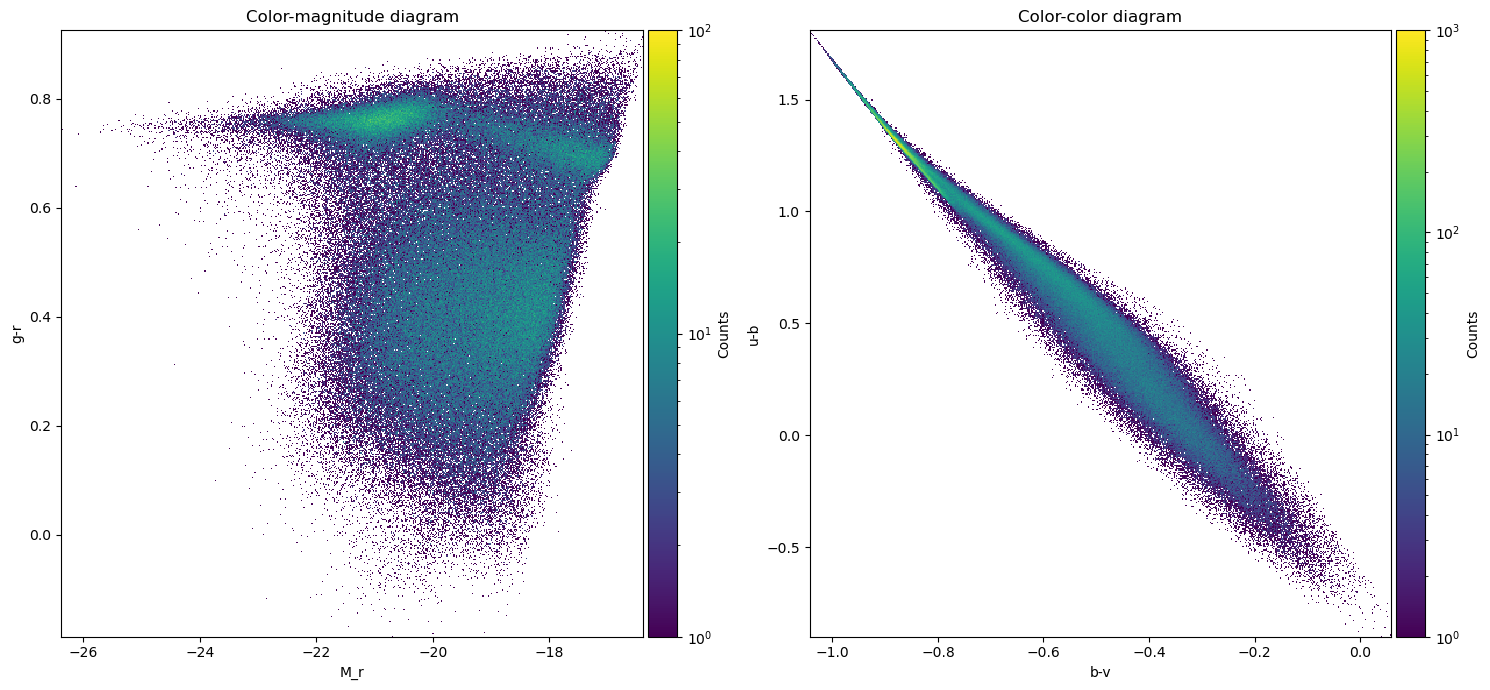

In [24]:
fig, ax = plt.subplots(1, 2, figsize=[15,7])

# Plot 1:

h_1 = ax[0].hist2d(r_mag[maskc], g_r[maskc], bins=500, cmin=1,norm=LogNorm(vmin=1, vmax=100))

divider_1 = make_axes_locatable(ax[0])
cax_1 = divider_1.append_axes("right", size="5%", pad=0.05)
cbar_1 = fig.colorbar(h_1[3], cax=cax_1, norm=LogNorm(), label='Counts')

ax[0].set_title('Color-magnitude diagram')
ax[0].set_xlabel(r'M_r')
ax[0].set_ylabel('g-r')


# Plot 2:

log_bins_x = np.logspace(np.log10(10), np.log10(15), 501)  # 501 bins desde 10^1 hasta 10^1.1761
log_bins_y = np.logspace(np.log10(1e-3), np.log10(1e-1), 501)  # 501 bins desde 10^-3 hasta 10^-1

h_2 = ax[1].hist2d(b_v[maskc], u_b[maskc], bins = [500, 500], cmin=1, norm=LogNorm(vmin=1, vmax=1000))


divider_2 = make_axes_locatable(ax[1])
cax_2 = divider_2.append_axes("right", size="5%", pad=0.05)
cbar_2 = fig.colorbar(h_2[3], cax=cax_2, label='Counts')

ax[1].set_title('Color-color diagram')
ax[1].set_xlabel(r'b-v')
ax[1].set_ylabel('u-b')

plt.tight_layout()
plt.show()

In [32]:
SubhaloSFR[maskc].max()

59.2189

/tmp/ipykernel_3233759/84084528.py:5: RuntimeWarning: divide by zero encountered in log10
  color = np.log10(SubhaloSFR[maskc])


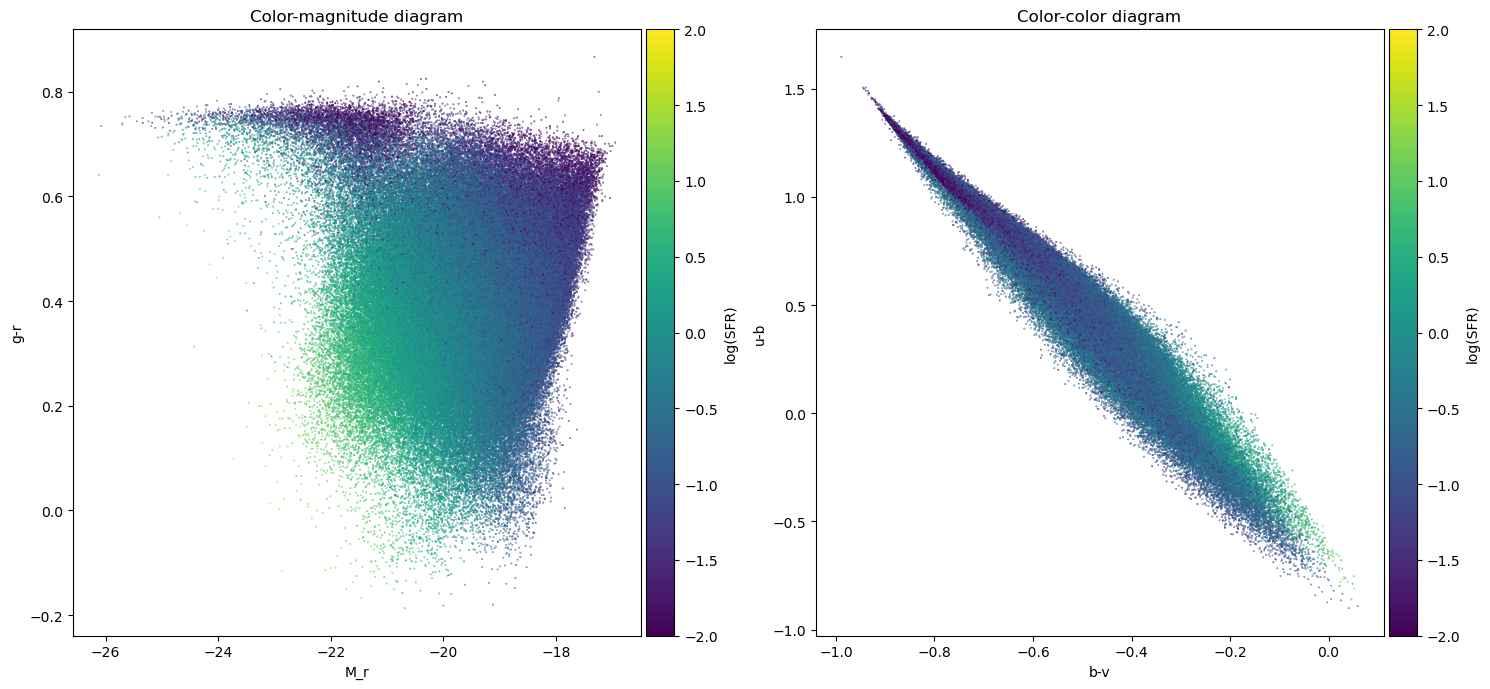

In [70]:
fig, ax = plt.subplots(1, 2, figsize=[15,7])

# Plot 1:

color = np.log10(SubhaloSFR[maskc])
h_1 = ax[0].scatter(r_mag[maskc], g_r[maskc], c=color, s=0.1, marker='o', label='Illustris-TNG', vmin=-2, vmax=2)

ax[0].set_title('Color-magnitude diagram')
ax[0].set_xlabel(r'M_r')
ax[0].set_ylabel('g-r')

divider_1 = make_axes_locatable(ax[0])
cax_1 = divider_1.append_axes("right", size="5%", pad=0.05)
cbar_1 = fig.colorbar(h_1, cax=cax_1, norm=LogNorm(), label='log(SFR)')



# Plot 2:

h_2 = ax[1].scatter(b_v[maskc], u_b[maskc], c=color, s=0.1, marker='o', label='Illustris-TNG', vmin=-2, vmax=2)


divider_2 = make_axes_locatable(ax[1])
cax_2 = divider_2.append_axes("right", size="5%", pad=0.05)
cbar_2 = fig.colorbar(h_2, cax=cax_2, label='log(SFR)')

ax[1].set_title('Color-color diagram')
ax[1].set_xlabel(r'b-v')
ax[1].set_ylabel('u-b')

plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=[15,7])

# Plot 1:

color = np.log10(SubhaloSFR[maskc]/StellarMass[maskc])
h_1 = ax[0].scatter(r_mag[maskc], g_r[maskc], c=color, s=1, marker='o', label='Illustris-TNG', vmin=-11, vmax=-9)


ax[0].set_title('Color-magnitude diagram')
ax[0].set_xlabel(r'M_r')
ax[0].set_ylabel('g-r')

divider_1 = make_axes_locatable(ax[0])
cax_1 = divider_1.append_axes("right", size="5%", pad=0.05)
cbar_1 = fig.colorbar(h_1, cax=cax_1, norm=LogNorm(), label='log(sSFR)')



# Plot 2:

h_2 = ax[1].scatter(b_v[maskc], u_b[maskc], c=color, s=1, marker='o', label='Illustris-TNG', vmin=-11, vmax=-9)


divider_2 = make_axes_locatable(ax[1])
cax_2 = divider_2.append_axes("right", size="5%", pad=0.05)
cbar_2 = fig.colorbar(h_2, cax=cax_2, label='log(sSFR)')

ax[1].set_title('Color-color diagram')
ax[1].set_xlabel(r'b-v')
ax[1].set_ylabel('u-b')

plt.tight_layout()
plt.show()

/tmp/ipykernel_3233759/341713184.py:5: RuntimeWarning: divide by zero encountered in log10
  color = np.log10(SubhaloSFR[maskc]/StellarMass[maskc])
